In [ ]:
# collections.Counter(s)

# key to solve this problem
# Deque(), append(right), popleft()
# array [] , append(), clear() -> delete all elements, pop(0) --> delete first element
# set(), --> st.add()

# collections.defaultdict(list) {1: []}
# [], append, sort() in ascending order
# use negative values to sort in desceding order and use normal sort()

# pq = [], heappush(pq, 2), heappop(), heappushpop(pq, 3), heapify(pq) -> convert list to heap
# nonlocal ans to get value from outer function then use it

# string s = "abca", i, j = s.find('a'), s.rfind('a') -> i = 0, j = 3

# from bisect import bisect_left, bisect_right
# similar to lower_bound, upper_bound in C++
# lower_bound / bisect_left return index of left most element greater or equal to target
# upper_bound / bisect_right return index of right most element greater than target

In [ ]:
# all imports
from typing import Optional, List
from heapq import heappop, heappush
from collections import deque
import collections
import bisect

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

### revisit

## https://leetcode.com/problems/count-k-subsequences-of-a-string-with-maximum-beauty/description/
## https://leetcode.com/problems/odd-even-jump/description/

In [ ]:
# Range Module
# solved using segment tree

class Node:
    def __init__(self, l, r, cover=False,lnode=None, rnode=None):
        self.cover = cover
        self.left = lnode
        self.right = rnode
        self.L = l
        self.R = r
        
class RangeModule:
    
    def updateRange(self, node, val, qs, qe):
        if qe < node.L or node.R < qs:
            return
        if qs <= node.L and node.R <= qe:
            node.cover = val
            node.left = node.right = None # Imp: purge all child if the range of this node is updated.
            return
        
        if not node.left:
            m = (node.L + node.R)//2
            node.left = Node(node.L, m, node.cover)
            node.right = Node(m+1, node.R, node.cover)

        self.updateRange(node.left, val, qs, qe)
        self.updateRange(node.right, val, qs, qe)
        node.cover = node.left.cover and node.right.cover

    def __init__(self):
        self.T = Node(1, 1000000000)
        

    def addRange(self, qs: int, qe: int) -> None:
        self.updateRange(self.T, True, qs, qe-1)

    def removeRange(self, qs: int, qe: int) -> None:
        self.updateRange(self.T, False, qs, qe-1)
    
    def queryRange(self, qs: int, qe: int) -> bool:
        def query(node):
            if qe < node.L or node.R < qs:
                return True
            
            if (qs <= node.L and node.R <= qe) or not node.left: # either node contained by q or cover is same for whole node.
                return node.cover
            
            return query(node.left) and query(node.right)
        
        qe -= 1
        return query(self.T)


# Array

####  https://leetcode.com/problems/maximum-strictly-increasing-cells-in-a-matrix/description/
#### Maximum Strictly Increasing Cells in a Matrix

Complexity
Time complexity:   O(m * n * log(m * n))
Space complexity:  O(m * n)
Input: mat = [[3,1,6],[-9,5,7]]
Output: 4
Path -->  -9, 3, 6, 7
You can go from cell with (r, c) to any other cell with either same r or same c.


##### Intiution is to sort all values in and there positions in map 
##### Then iterate over the sorted values and update the max increasing path for each cell
##### Finally return the max value from the row and column arrays

```
class Solution {
public:
    int maxIncreasingCells(vector<vector<int>>& mat) {
        int m = mat.size(), n = mat[0].size();
        unordered_map<int, vector<vector<int>>> um;
        vector<vector<int>> temp(m, vector<int> (n));
        vector<int> r(m), c(n);
        set<int> s;

        for (int i=0; i<m; i++) {
            for (int j=0; j<n; j++) {
                um[-mat[i][j]].push_back({i, j});
                s.insert(-mat[i][j]);
            }
        }

        for (int num : s) {
            for (auto v : um[num]) {
                int i = v[0], j = v[1];
                temp[i][j] = max(r[i], c[j]) + 1;
            }
            for (auto v : um[num]) {
                int i = v[0], j = v[1];
                r[i] = max(r[i], temp[i][j]);
                c[j] = max(c[j], temp[i][j]);
            }
        }

        return max(*max_element(r.begin(), r.end()), *max_element(c.begin(), c.end()));
    }
};
```


In [ ]:
# https://leetcode.com/problems/rle-iterator/

# even index is frequency and odd index is value
"""
Input
["RLEIterator", "next", "next", "next", "next"]
[[[3, 8, 0, 9, 2, 5]], [2], [1], [1], [2]]
Output
[null, 8, 8, 5, -1]
"""

class RLEIterator:
    
    def __init__(self, encoding: List[int]):
        self.v = encoding
        self.idx = 0

    def next(self, n: int) -> int:
        while self.idx < len(self.v):
            if self.v[self.idx] >= n:
                self.v[self.idx] -= n
                return self.v[self.idx+1]
            else:
                n -= self.v[self.idx]
                self.idx += 2
        return -1


In [ ]:
###  Maximum Length of Semi-Decreasing Subarrays
# https://doocs.github.io/leetcode/en/lc/2863/?h=maximum+length+decre#description

from cmath import inf
from collections import defaultdict

"""
Input: nums = [7,6,5,4,3,2,1,6,10,11]
Output: 8
Explanation: Take the subarray [7,6,5,4,3,2,1,6].
Input: nums = [57,55,50,60,61,58,63,59,64,60,63]
Output: 6
Explanation: Take the subarray [61,58,63,59,64,60].
"""

class Solution:
    def maxSubarrayLength(self, nums: List[int]) -> int:
        d = defaultdict(list)
        for i, x in enumerate(nums):
            d[x].append(i)
        ans, k = 0, inf
        print(d)
        print(sorted(d, reverse=True))
        for x in sorted(d, reverse=True):
            ans = max(ans, d[x][-1] - k + 1)
            k = min(k, d[x][0])
            print(x, ans, k)
        return ans

s= Solution()
arr = [7,6,5,4,3,2,1,6,10,11]
s.maxSubarrayLength(arr)

In [ ]:
# https://leetcode.com/problems/range-module/description/

# to solve this problem we need to use bisect_left and bisect_right
# addRange -> find start and end index of left and right
# if start and end are even then to be added range falls outside of any range
# if start is even then we need to add left to track
# if end is even then we need to add right to track

# removeRange -> find start and end index of left and right
# if start is odd then we need to add left to track
# if end is odd then we need to add right to track

# queryRange -> find start and end index of left and right
# if start and end are same and start is odd then return True else False

from bisect import bisect


class RangeModule:

    def __init__(self):
        self.track = []

    def addRange(self, left, right):
        start = bisect.bisect_left(self.track, left)
        end = bisect.bisect_right(self.track, right)
        
        subtrack = []
        if start % 2 == 0:
            subtrack.append(left)
        if end % 2 == 0:
            subtrack.append(right)
        print(self.track)
        self.track[start:end] = subtrack
        print(self.track)

    def removeRange(self, left, right):
        start = bisect.bisect_left(self.track, left)
        end = bisect.bisect_right(self.track, right)
        
        subtrack = []
        if start % 2 == 1:
            subtrack.append(left)
        if end % 2 == 1:
            subtrack.append(right)
        print(self.track)
        self.track[start:end] = subtrack
        print(self.track)
		
    def queryRange(self, left, right):
        start = bisect.bisect_right(self.track, left)
        end = bisect.bisect_left(self.track, right)
		
        return start == end and start % 2 == 1


### https://leetcode.com/problems/finding-mk-average/description/

* remove -> left elements of size k and right elements of size k
* mid -> now has size of m - 2*k
* maintain three multiset left, mid, right

```
int m = 0, k = 0, sz = 0, pos = 0;
long sum = 0;
vector<int> v;
multiset<int> left, mid, right;
void remove(int n) {
    if (n <= *rbegin(left))
        left.erase(left.find(n));
    else if (n <= *rbegin(mid)) {
       auto it = mid.find(n); 
       sum -= *it;
       mid.erase(it);
    }
    else
        right.erase(right.find(n));
    if (left.size() < k) {
        left.insert(*begin(mid));
        sum -= *begin(mid);
        mid.erase(begin(mid));
    }
    if (mid.size() < sz) {
        mid.insert(*begin(right));
        sum += *begin(right);
        right.erase(begin(right));
    }
}
void add(int n) {
    left.insert(n);
    if (left.size() > k) {
        auto it = prev(end(left));
        mid.insert(*it);
        sum += *it;
        left.erase(it);
    }
    if (mid.size() > sz) {
        auto it = prev(end(mid));
        sum -= *it;
        right.insert(*it);
        mid.erase(it);
    }
}
MKAverage(int m, int k) : m(m), k(k), sz(m - 2 * k) {
    v = vector<int>(m);
}
void addElement(int num) {
    if (pos >= m)
        remove(v[pos % m]);
    add(num);
    v[pos++ % m] = num;
}
int calculateMKAverage() {
    if (pos < m)
        return -1;
    return sum / sz;
}
```

In [ ]:
# https://leetcode.com/problems/minimum-difference-between-largest-and-smallest-value-in-three-moves/description/
# Return the minimum difference between the largest and smallest value of nums after performing at most three moves.

"""
kill 3 biggest elements
kill 2 biggest elements + 1 smallest elements
kill 1 biggest elements + 2 smallest elements
kill 3 smallest elements
"""

class Solution:
    def minDifference(self, nums: List[int]) -> int:
        n = len(nums)
        nums.sort()
        if n < 5:
            return 0
        
        return min([nums[n-1] - nums[3], nums[n-2]-nums[2], nums[n-3]-nums[1], nums[n-4]-nums[0]])

In [ ]:
# https://leetcode.com/problems/queue-reconstruction-by-height/description/

"""
Input: people = [[7,0],[4,4],[7,1],[5,0],[6,1],[5,2]]
Output: [[5,0],[7,0],[5,2],[6,1],[4,4],[7,1]]
"""

class Solution:
    def reconstructQueue(self, people: List[List[int]]) -> List[List[int]]:
        # sort the people from tall to short
        # insert from tall to short (insert at index = p[1])
        people.sort(key=lambda p: (-p[0], p[1]))
        res = []
        for p in people:
            res.insert(p[1], p)
        return res

In [ ]:
# https://leetcode.com/problems/find-original-array-from-doubled-array/description/

"""
First we take a map, then we sort the given array changed.
We keep removing the smallest element n and 2 * n and keep putting n into the answer until changed array becomes empty.
If at anytime the we are unable to remove elements we return empty array.
"""

##### https://leetcode.com/problems/removing-minimum-and-maximum-from-array/description/

Intuition: Find the two indices of the maximum and minimum elements, say a and b. The order doesn't matter. We only need to consider 3 cases:

Delete both from left and right.
Delete only from left
Delete only from right
Algorithm:

Make sure a <= b, and return the minimum of the following:

* (a + 1) + (N - b) -> delete both from left and right
* b + 1 -> delete from left
* N - a -> delete from right

```
class Solution {
public:
    int minimumDeletions(vector<int>& A) {
        int a = max_element(begin(A), end(A)) - begin(A), b = min_element(begin(A), end(A)) - begin(A), N = A.size();
        if (a > b) swap(a, b);
        return min({ a + 1 + N - b, b + 1, N - a });
    }
};
```

#### https://leetcode.com/problems/arithmetic-subarrays/description/
#### give an array of n integers and q queries where each query consists of a pair of indices (l, r) check if the elements of the subarray are in arithmetic progression.

```
class Solution {
public:
    vector<bool> checkArithmeticSubarrays(vector<int>& nums, vector<int>& l, vector<int>& r) {
        vector<bool> res;
        for (auto i = 0; i < l.size(); ++i) {
            if (r[i] - l[i] < 2)
                res.push_back(true);
            else {
                vector<int> n(begin(nums) + l[i], begin(nums) + r[i] + 1);
                int j = 2;
                sort(begin(n), end(n));
                for (; j < n.size(); ++j)
                    if (n[j] - n[j - 1] != n[1] - n[0])
                        break;
                res.push_back(j == n.size());
            }
        }
        return res;
    }
};
```

In [ ]:
#### https://leetcode.com/problems/product-of-the-last-k-numbers/description/

#### Product of the Last K Numbers
# Similar to prefix sum
# We keep track of all prefix products in an array A
# If k is greater than length of A then return 0
# Else return A[-1] / A[-k-1]
# if current element is 0 then we reset A to [1]


def __init__(self):
    self.A = [1]

def add(self, a):
    if a == 0:
        self.A = [1]
    else:
        self.A.append(self.A[-1] * a)

def getProduct(self, k):
    if k >= len(self.A): return 0
    return self.A[-1] / self.A[-k - 1]

In [ ]:
# https://leetcode.com/problems/trapping-rain-water/description/

# take two arrays l, r to store max height from left and right
# l[i] = max(l[i-1], height[i])
# r[i] = max(r[i+1], height[i])
# ans += min(l[i], r[i]) - height[i] for i in range(n)

class Solution:
    def trap(self, height: List[int]) -> int:
        n = len(height)
        l, r = [0]*n, [0]*n
        l[0] = height[0]
        r[n-1] = height[n-1]

        for i in range(1, n):
            l[i] = max(l[i-1], height[i])

        for i in range(n-2, -1, -1):
            r[i] = max(r[i+1], height[i])

        ans = 0
        for i in range(n):
            ans += min(l[i], r[i]) - height[i]

        return ans
        

https://leetcode.com/problems/rotate-image/description/

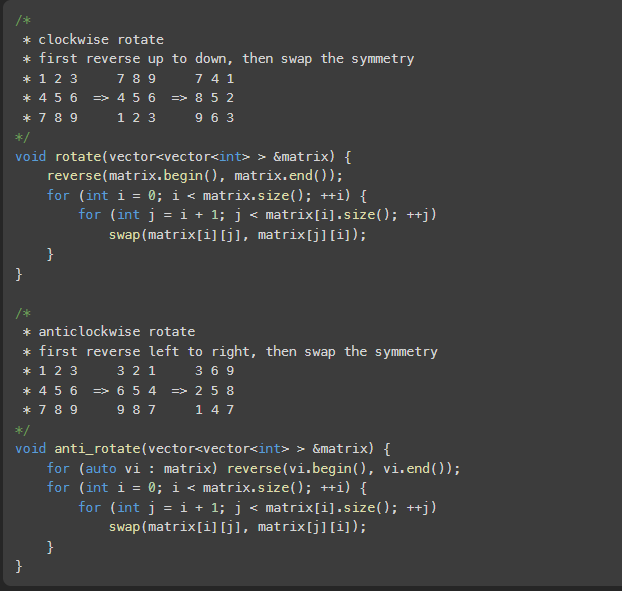

# Strings

### https://leetcode.com/problems/number-of-valid-clock-times/description/

Input: time = "?5:00"
Output: 2
```
int countTime(string time) {
    int ans = 1;
    if(time[4] == '?') ans = ans * 10;
    if(time[3] == '?') ans = ans * 6;
    
    if(time[0] == '?' && time[1] == '?') ans = ans * 24;
    else{
        if(time[1] == '?'){ 
            if(time[0] == '2' ) ans = ans * 4;
            else ans = ans * 10;
        }
        if(time[0] == '?'){
            if(time[1] < '4') ans = ans * 3;
            else ans = ans * 2;
        }
    }
    return ans;
}
```

In [ ]:
# https://leetcode.com/problems/check-if-a-parentheses-string-can-be-valid/description/
# 2116. Check if a Parentheses String Can Be Valid

"""
We iterate over the string s twice.
Count of variable brackets is maintained using tot
Count of fixed open brackets is maintained using op
Count of fixed closed brackets is maintained using cl
In forward iteration we are checking if we have too many fixed closed brackets ), this is achieved using: if tot + op - cl < 0: return False
In backward iteration we are checking if we have too many fixed open brackets (, this is achieved using: if tot - op + cl < 0: return False
"""

def canBeValid(self, s: str, l: str) -> bool:
    if len(s) % 2 == 1: return False
    tot = op = cl = 0 # tot -> Total variable brackets, op -> Open, cl -> Closed
    for i in range(len(s) - 1, -1, -1):
        if l[i] == '0': tot += 1
        elif s[i] == '(': op += 1
        elif s[i] == ')': cl += 1
        if tot - op + cl < 0: return False
    tot = op = cl = 0
    for i in range(len(s)):
        if l[i] == '0': tot += 1
        elif s[i] == '(': op += 1
        elif s[i] == ')': cl += 1
        if tot + op - cl < 0: return False 
    return True

#### https://leetcode.com/problems/find-and-replace-in-string/

* sort and start replacement from end

```
class Solution {
public:
    string findReplaceString(string S, vector<int>& indices, vector<string>& sources, vector<string>& targets) {

        vector<pair<int, int>> sortedIndices;
        set<int> indexProcessed;
        for (int i = 0 ; i < indices.size(); i++)
            sortedIndices.push_back({indices[i], i});
        sort(rbegin(sortedIndices), rend(sortedIndices));
        for (auto ind : sortedIndices) {
            int i = ind.first;
            string s = sources[ind.second], t = targets[ind.second];
            if (indexProcessed.find(i) == indexProcessed.end() 
            && S.substr(i, s.length()) == s) {
                indexProcessed.insert(i);
                S = S.substr(0, i) + t + S.substr(i + s.length());
            }
        }
        return S;
    }
};
```


##### https://leetcode.com/problems/find-longest-special-substring-that-occurs-thrice-ii/description/
##### special substring that occurs thrice --> special substring means all chracters are same

```
Input: s = "aaaa"
Output: 2

Input: s = "abcdef"
Output: -1
```
class Solution {
public:
    int maximumLength(std::string s) {
        int n = s.length();
        std::vector<std::vector<int>> freq(26, std::vector<int>(n + 1, 0));
        char pre = s[0];

        int len = 1;
        freq[s[0] - 'a'][1] = 1;
        int ans = -1;

        for (int i = 1; i < n; i++) {
            char cur = s[i];
            if (cur == pre) {
                len++;
                freq[cur - 'a'][len] += 1;
            } else {
                freq[cur - 'a'][1] += 1;
                pre = cur;
                len = 1;
            }
        }

        for (int i = 0; i < 26; i++) {
            int preSum = 0;
            for (int j = n; j >= 1; j--) {
                preSum += freq[i][j];
                if (preSum >= 3) {
                    ans = std::max(ans, j);
                    break;
                }
            }
        }

        return ans;
    }
};
```

In [ ]:
# Find the Closest Palindrome
# https://leetcode.com/problems/text-justification/description/

##### https://leetcode.com/problems/longest-palindrome-by-concatenating-two-letter-words/description/
#### SInce each string contains only two letters so we can easily store this letters in a 2-D array

```
class Solution {
public:
    int longestPalindrome(vector<string>& words) {
        
       int count[26][26] = {}; 
       int ans =0;
        
			for(auto w : words){
				int a = w[0] - 'a';
				int b = w[1] - 'a'; 

				if(count[b][a]){
					ans+= 4;          
					count[b][a]--;   // decrement the count as we found mirror word
				}else
					count[a][b]++;  //increment the current word count if we not find any mirror word
			}
        
			for(int i=0;i<26;i++){
				if(count[i][i]){
					ans+=2;
					break;
				}
			 }
      
	return ans;
         
    }
};
```

In [ ]:
# https://leetcode.com/problems/unique-length-3-palindromic-subsequences/description/

"""
Input: s = "aabca"
Output: 3
Explanation: The 3 palindromic subsequences of length 3 are:
- "aba" (subsequence of "aabca")
- "aaa" (subsequence of "aabca")
- "aca" (subsequence of "aabca")
"""

class Solution:
    def countPalindromicSubsequence(self, s: str) -> int:
    
        res = 0
        uniq = set(s)
        
        for c in uniq:
            start = s.find(c) # search a character from the beginning
            end = s.rfind(c) # search a character from the last index
            
            if start < end:
                res += len(set(s[start+1:end]))
        
        return res

##### https://leetcode.com/problems/longest-absolute-file-path/description/

Input: input = "dir\n\tsubdir1\n\tsubdir2\n\t\tfile.ext"
Output: 20
- Explanation: We have only one file, and the absolute path is "dir/subdir2/file.ext" of length 20.

Input: input = "dir\n\tsubdir1\n\t\tfile1.ext\n\t\tsubsubdir1\n\tsubdir2\n\t\tsubsubdir2\n\t\t\tfile2.ext"
Output: 32
- Explanation: We have two files:
- "dir/subdir1/file1.ext" of length 21
- "dir/subdir2/subsubdir2/file2.ext" of length 32.
- We return 32 since it is the longest absolute path to a file.

```
    input.push_back('\n');
    vector<int> levels(300, 0);
    int level = 0;
    bool isFile = false;
    int ans = 0;
    int length = 0;
        
    for(char c: input){
        switch(c){
            case '\n': { level = 0; length = 0; isFile=false; break; }
            case '\t': { level++; break; }
            case '.' : isFile = true;
                
            default:
                length++;
                levels[level] = length;
                if(isFile){
                    ans = max(ans, accumulate(levels.begin(), levels.begin() + level + 1, 0) + level);
                }
        }
    }
    
    return ans;
```

##### https://leetcode.com/problems/longest-string-chain/description/

Input: words = ["a","b","ba","bca","bda","bdca"]
Output: 4
Explanation: One of the longest word chains is ["a","ba","bda","bdca"].

```
class Solution {
public:
    int longestStrChain(vector<string>& words) {
        int ans = 0;
        unordered_map<string, int> um;
        sort(words.begin(), words.end(), [](string a, string b) {
            return a.length() < b.length();
        });
        
        for (auto word : words) {
            um[word] = 1;
            for (int i=0; i<word.size(); i++) {
                string temp = word.substr(0, i) + word.substr(i+1, word.size()-(i+1));
                if (um.count(temp) && (um[temp] + 1) > um[word]) {
                    um[word] = um[temp] + 1;
                }
                ans = max(ans, um[word]);
            }
        }
        
        return ans;
    }
};
```

In [ ]:
# https://leetcode.com/problems/decode-string/description/

class Solution(object):
    def decodeString(self, s):
        stack = []; curNum = 0; curString = ''
        for c in s:
            if c == '[':
                stack.append(curString)
                stack.append(curNum)
                curString = ''
                curNum = 0
            elif c == ']':
                num = stack.pop()
                prevString = stack.pop()
                curString = prevString + num*curString
            elif c.isdigit():
                curNum = curNum*10 + int(c)
            else:
                curString += c
        return curString

# Two Pointers

#### https://leetcode.com/problems/sort-colors/description/
#### sort 0, 1, 2 in place
#### when we encounter 0 we swap it with low and increment low and mid
#### when we encounter 1 we just increment mid
#### when we encounter 2 we swap it with high and decrement high

```
class Solution {
public:
    void sortColors(vector<int>& nums) {
        int low = 0, mid = 0, high = nums.size()-1;
        while (mid <= high) {
            if (nums[mid] == 0) {
                swap(nums[low], nums[mid]);
                low++;
                mid++;
            } else if (nums[mid] == 1) {
                mid++;
            } else {
                swap(nums[mid], nums[high]);
                high--;
            }
        }
    }
};
```

# Sliding Window

#### https://leetcode.com/problems/longest-repeating-character-replacement/description/

```
class Solution {
public:
    char getMax(unordered_map<char, int> um) {
        char c = um.begin()->first; 
        int mx = um.begin()->second;
        for (auto e : um) {
            if (e.second > mx) {
                mx = e.second;
                c = e.first;
            }
        }

        return c;
    }
    int characterReplacement(string s, int k) {
        int n = s.size(), ans = 0, start = 0, end = 0;
        unordered_map<char, int> um;
        while (end < n) {
            um[s[end]]++;
            char c = getMax(um);
            while (start < end and end-start+1 > um[c]+k) {
                um[s[start]]--;
                c = getMax(um);
                start++;
            }
            end++;
            ans = max(ans, end-start);
        }
        return ans;
    }
};
```

#### https://leetcode.com/problems/constrained-subsequence-sum/description/
#### similar to sliding window maximum

```
class Solution {
public:
    int constrainedSubsetSum(vector<int>& nums, int k) {
        int n = nums.size();
        vector<int> dp(n);
        deque<int> dq;
        int ans = INT_MIN;
        for (int i=0; i<n; i++) {
            int mx = max(0, dq.empty() ? 0 : dp[dq.front()]);
            dp[i] = nums[i] + mx;
            ans = max(ans, dp[i]);
            while (!dq.empty() and dp[i] >= dp[dq.back()]) {
                dq.pop_back();
            } 
            dq.push_back(i);
            if (i-dq.front()+1 > k) {
                dq.pop_front();
            }
        }

        return ans;
    }
};
```

##### https://leetcode.com/problems/longest-substring-without-repeating-characters/description/

```
class Solution {
public:
    int lengthOfLongestSubstring(string s) {
        int start = 0, end = 0, n = s.size(), ans = 0;
        unordered_map<char, int> um;
        while (end < n) {
            um[s[end]]++;
            while (start <= end and um[s[end]] > 1) {
                um[s[start]]--;
                start++;
            }
            end++;
            ans = max(ans, end-start);
        }
        return ans;
    }
};
```

In [ ]:
# 1423. Maximum Points You Can Obtain from Cards
# https://leetcode.com/problems/maximum-points-you-can-obtain-from-cards/description/

# here you can take card from either beginning or end of the array
# standard sliding window problem with k elements here we need to minimize (n-k) elements in the middle

class Solution:
    def maxScore(self, C: List[int], k: int) -> int:
        start, end = 0, 0
        n = len(C)
        ans, curr = float('inf'), 0  # Initialize ans to infinity
        while end < n:
            curr += C[end]
            while start <= end and end - start + 1 >= n - k:
                if end - start + 1 == n - k:
                    ans = min(ans, curr)
                curr -= C[start]
                start += 1
            end += 1
        # Handle edge cases
        if ans == float('inf'):
            ans = 0
        return sum(C) - int(ans)
            


# Binary Search

In [ ]:
# https://leetcode.com/problems/split-array-largest-sum/description/

class Solution:
    def splitArray(self, nums: List[int], m: int) -> int:
        
        def satisfy(nums, m, mid):
            currSum = 0
            currAns = 0
            
            for num in nums:
                if num > mid:
                    return False
                
                if (currSum + num > mid):
                    currAns += 1
                    currSum = num
                else:
                    currSum += num
            
            if (currSum == 0):
                return currAns <= m
            else:
                return currAns + 1 <= m
        
        l, h = 0, 1e9
        ans = 0
        
        while l <= h:
            mid = l + (h - l) // 2;
            
            if satisfy(nums, m , mid):
                ans = mid
                h = mid - 1
            else:
                l = mid + 1
        
        return int(ans)

In [ ]:
# https://leetcode.com/problems/3sum/description/
# https://leetcode.com/problems/4sum/description/

# k-sum to solve any k-sum problem
# sort the array
# start from 0 to n-1
# if k == 2 then use two pointer approach
# if k > 2 then use recursion to solve k-1 sum
# remove duplicates by checking if current element is same as previous element

class Solution:
    def fourSum(self, nums: List[int], target: int) -> List[List[int]]:
        
        def recurr(start, end, k, target, curr_ans, ans):
            #print(start, end, k, target, curr_ans, ans)
            if start > end:
                return ans
            
            if k == 2:
                l, r = start, end
                while l < r:
                    cur_sum = nums[l] + nums[r]
                    if cur_sum > target:
                        r -= 1
                    elif cur_sum < target:
                        l += 1
                    else:
                        ans.append(curr_ans + [nums[l], nums[r]])
                        while l+1 < r and nums[l] == nums[l+1]:
                            l += 1
                        while r-1 >= 0 and nums[r] == nums[r-1]:
                            r -= 1
                        l += 1
                        r -= 1
            else:        
                while start < end:
                    recurr(start+1, end, k-1, target-nums[start], curr_ans+[nums[start]], ans)
                    while start+1 < end and nums[start] == nums[start+1]:
                        start += 1
                    start += 1
            
        def ksum(k):
            res = []
            nums.sort()
            recurr(0, len(nums)-1, k, target, [], res)
            return res
        
        return ksum(4)

##### Median of Two Sorted Arrays using binary search
##### https://leetcode.com/problems/median-of-two-sorted-arrays/description/

```
class Solution {
public:
    double findMedianSortedArrays(vector<int>& nums1, vector<int>& nums2) {
        int m = nums1.size(), n = nums2.size();
        
        if (n < m) {
            return findMedianSortedArrays(nums2, nums1);
        }
        
        double ans = 0;
        
        int low = 0, high = m;
        
        while (low <= high) {
            int x_part = (low+high) / 2;
            int y_part = ((m+n+1) / 2) - x_part;
            
            int maxLeftX =x_part == 0 ? INT_MIN : nums1[x_part-1];
            int minRightX = x_part == m ? INT_MAX : nums1[x_part];
            int maxLeftY = y_part == 0 ? INT_MIN : nums2[y_part-1];
            int minRightY = y_part == n ? INT_MAX : nums2[y_part];
            
            
            if (maxLeftX <= minRightY && maxLeftY <= minRightX) {
                if ((m+n) % 2 == 0) {
                    return (double)((max(maxLeftX, maxLeftY) + min(minRightX, minRightY))  / 2.0);
                } else {
                    return (double)max(maxLeftX, maxLeftY);
                }
            } else if (maxLeftX > minRightY) {
                high = x_part-1;
            }
            else {
                low = x_part+1;
            }
        }
        
        return ans;
    }
};
```

# Greedy

##### https://leetcode.com/problems/the-latest-time-to-catch-a-bus/description/

Example 1:
Input: buses = [10,20], passengers = [2,17,18,19], capacity = 2
Output: 16
- Explanation: Suppose you arrive at time 16.
- At time 10, the first bus departs with the 0th passenger. 
- At time 20, the second bus departs with you and the 1st passenger.
- Note that you may not arrive at the same time as another passenger, which is why you must arrive before the 1st passenger to catch the bus.

Example 2:
- Input: buses = [20,30,10], passengers = [19,13,26,4,25,11,21], capacity = 2
Output: 20
- Explanation: Suppose you arrive at time 20.
- At time 10, the first bus departs with the 3rd passenger. 
- At time 20, the second bus departs with the 5th and 1st passengers.
- At time 30, the third bus departs with the 0th passenger and you.
- Notice if you had arrived any later, then the 6th passenger would have taken your seat on the third bus.

```
// My Code
class Solution {
public:
    int latestTimeCatchTheBus(vector<int>& buses, vector<int>& passengers, int totalCapacity){
        sort(buses.begin(), buses.end());
        sort(passengers.begin(), passengers.end());
        
        int i = 0, j = 0, n = buses.size(), m = passengers.size(), currentCapacity;
        while(i < n){
            currentCapacity = 0;
            while(j < m && currentCapacity < totalCapacity && passengers[j] <= buses[i]){
                j++;
                currentCapacity++;
            }
            
			// Last Bus
            if(i == n - 1){
                j--;
                // If last bus has some seats left, then reach station at last bus departure time.
                if(currentCapacity < totalCapacity){
                    int time = buses[i];
                    while(j >= 0 && time == passengers[j]){ // if time clashes with other passenger, reach 1 minute early
                        time--, j--;
                    }
                    return time;
                }else{
                    // If bus is full, then we have to reach before the last person which is on board
                    int time = passengers[j] - 1;
                    j--;
                    while(j >= 0 && time == passengers[j]){  // if time clashes with other passenger, reach 1 minute early
                        time--, j--;
                    }
                    return time;
                }
            }
            i++;
        }
        return buses.back(); // just compiler thing
    }
};
```

# Priority Queues

In [ ]:
# https://leetcode.com/problems/meeting-rooms-iii/solutions/4509113/python3-one-heap-and-two-heaps-solutions-all-meeting-rooms-solutions/

In [ ]:
# https://leetcode.com/problems/meeting-rooms-iii/

# key to solve this problem is to maintain to pq one for meetings other is to get free_rooms
# if we have free_rooms then assign room to meeting
# if we don't have free_rooms then assign room to meeting which is going to end first

class Solution:
    def mostBooked(self, n: int, meetings: List[List[int]]) -> int:
        free_rooms, bookings, ans = list(range(n)), [], [0]*n
        meetings.sort()
        for start, end in meetings:
            while bookings and bookings[0][0] <= start:
                _, room = heappop(bookings)
                heappush(free_rooms, room)

            if free_rooms:
                room = heappop(free_rooms)
                heappush(bookings, (end, room))
            else:
                release, room = heappop(bookings)
                heappush(bookings, (release+(end-start), room))
            
            ans[room] += 1

        return ans.index(max(ans))

In [ ]:
# https://leetcode.com/problems/single-threaded-cpu/

import heapq
"""
Sort the tasks according to start time, remember to keep a reference to the original task index
tasks = [[start_time, process_time, original_index], ..., ...]
Set the current time to the first start time in the task list.
Push all tasks whose start time is ≤ the current time into heap h.
heapq.heappush(h, (process_time, original_index))
Notice we don't care about start time, since we know any item pushed into
the heap is already past it's start_time.
Pop the first task to be processed.
Increase the current time by the processed time.
Repeat
"""

class Solution:
    def getOrder(self, tasks: List[List[int]]) -> List[int]:
        res = []
        tasks = sorted([(t[0], t[1], i) for i, t in enumerate(tasks)])
        i = 0
        h = []
        time = tasks[0][0]
        while len(res) < len(tasks):
            while (i < len(tasks)) and (tasks[i][0] <= time):
                heapq.heappush(h, (tasks[i][1], tasks[i][2])) # (processing_time, original_index)
                i += 1
            if h:
                t_diff, original_index = heapq.heappop(h)
                time += t_diff
                res.append(original_index)
            elif i < len(tasks):
                time = tasks[i][0]
        return res

In [ ]:
# Merge Interval / Employee Free Time
# https://github.com/doocs/leetcode/blob/main/solution/0700-0799/0759.Employee%20Free%20Time/README_EN.md

In [ ]:
# Meeting Rooms II - Find the minimum number of conference rooms required
# https://github.com/doocs/leetcode/blob/main/solution/0200-0299/0253.Meeting%20Rooms%20II/README_EN.md

##### https://leetcode.com/problems/my-calendar-i/description/

```
If the current start,end overlaps with some other events, there will be a previous end which is greater than the current one. Therefore, we can keep the end points in a map. Then we just have to check whether the next greater element has a start point greater than the current end or not.
 map<int,int>events;
    MyCalendar() {   
    }
    bool book(int start, int end) {
        auto next = events.upper_bound(start);
        if(next != events.end() &&   (*next).second < end)return false;
        events.insert({end,start});
        return true;
    }
```

##### https://leetcode.com/problems/find-median-from-data-stream/description/

- maintain two priority queue one small and one large
- if length of both pq are same then add to small pq and then pop from small and add to large
- else 


```
class MedianFinder {
public:
    priority_queue<int> maxHeap;
    priority_queue<int, vector<int>, greater<int>> minHeap;
    
    MedianFinder() {
    }
    void addNum(int num) {
        maxHeap.push(num);
        minHeap.push(maxHeap.top());
        maxHeap.pop();
        if (minHeap.size() > maxHeap.size()) {
            maxHeap.push(minHeap.top());
            minHeap.pop();
        }
    }
    double findMedian() {
        if (maxHeap.size() > minHeap.size()) return maxHeap.top();
        return (maxHeap.top() + minHeap.top()) / 2.0;
    }
};
```

# Trie

In [ ]:
# https://github.com/doocs/leetcode/blob/main/solution/0600-0699/0642.Design%20Search%20Autocomplete%20System/README_EN.md

class Trie:
    def __init__(self):
        self.children = [None] * 27
        self.v = 0
        self.w = ''

    def insert(self, w, t):
        node = self
        for c in w:
            idx = 26 if c == ' ' else ord(c) - ord('a')
            if node.children[idx] is None:
                node.children[idx] = Trie()
            node = node.children[idx]
        node.v += t
        node.w = w

    def search(self, pref):
        node = self
        for c in pref:
            idx = 26 if c == ' ' else ord(c) - ord('a')
            if node.children[idx] is None:
                return None
            node = node.children[idx]
        return node


class AutocompleteSystem:
    def __init__(self, sentences: List[str], times: List[int]):
        self.trie = Trie()
        for a, b in zip(sentences, times):
            self.trie.insert(a, b)
        self.t = []

    def input(self, c: str) -> List[str]:
        def dfs(node):
            if node is None:
                return
            if node.v:
                res.append((node.v, node.w))
            for nxt in node.children:
                dfs(nxt)

        if c == '#':
            s = ''.join(self.t)
            self.trie.insert(s, 1)
            self.t = []
            return []

        res = []
        self.t.append(c)
        node = self.trie.search(''.join(self.t))
        if node is None:
            return res
        dfs(node)
        res.sort(key=lambda x: (-x[0], x[1]))
        return [v[1] for v in res[:3]]

# Recurrsion

In [ ]:
# give cards of length 4 with different values try to make 24 using +, -, *, /
# https://leetcode.com/problems/24-game/description/

# key to solve this problem is to use recursion to solve subproblems
# if we have only one card then check if it is 24.0
# if we have more than one card then try to solve subproblems by adding, subtracting, multiplying, dividing

class Solution:
    def judgePoint24(self, cards: List[int]) -> bool:
        if len(cards) == 1 and abs(cards[0]-24.0) <= 0.001:
            return True

        for i in range(len(cards)):
            for j in range(len(cards)):
                if i != j:
                    base = [cards[k] for k in range(len(cards)) if k != i and k != j]
                    if self.judgePoint24(base + [cards[i] + cards[j]]): return True
                    if self.judgePoint24(base + [cards[i] * cards[j]]): return True
                    if self.judgePoint24(base + [cards[i] - cards[j]]): return True
                    if self.judgePoint24(base + [cards[j] - cards[i]]): return True
                    if cards[i] != 0 and self.judgePoint24(base + [cards[j] / cards[i]]): return True
                    if cards[j] != 0 and self.judgePoint24(base + [cards[i] / cards[j]]): return True
        return False
        

# Inverse Pairs - Merge Sort
### https://leetcode.com/problems/count-of-smaller-numbers-after-self/description/

```
typedef pair<int, int> pa;
class Solution {
public:
    void mergeSort(vector<pair<int, int>>& indices, int low, int end, vector<int>& ans) {
        if (low >= end) {
            return;
        };
        
        int mid = low + (end - low) / 2;
        mergeSort(indices, low, mid, ans);
        mergeSort(indices, mid+1, end, ans);
        vector<pa> merged;
        
        int left = low, right = mid+1;
        int numOfElementsOnRightSideLessThanLeft = 0;
        while (left  <= mid && right <= end) {
            if (indices[left].first > indices[right].first) {
                numOfElementsOnRightSideLessThanLeft++;
                merged.push_back(indices[right]);
                right++;
            } else {
                ans[indices[left].second] += numOfElementsOnRightSideLessThanLeft;
                merged.push_back(indices[left]);
                left++;
            }
        }
        
        while (left <= mid) {
            ans[indices[left].second] += numOfElementsOnRightSideLessThanLeft;
            merged.push_back(indices[left]);
            left++;
        }
        
        while (right <= end) {
            merged.push_back(indices[right]);
            right++;
        }
        
        int start = low;
        
        for (auto pa : merged) {
            indices[start].first = pa.first;
            indices[start].second = pa.second;
            start++;
        }
    }
    
    vector<int> countSmaller(vector<int>& nums) {
        vector<pair<int, int>> indices;
        int n = nums.size();
        for (int i=0; i<nums.size(); i++) {
            indices.push_back(make_pair(nums[i], i));
        }
        vector<int> ans(n);
        
        mergeSort(indices, 0, n-1, ans);
        
        return ans;
    }
};
```

In [ ]:
# https://github.com/doocs/leetcode/blob/main/solution/0600-0699/0681.Next%20Closest%20Time/README_EN.md
# Next closest time
"""
Input: time = "19:34"
Output: "19:39"
Explanation: The next closest time choosing from digits 1, 9, 3, 4, is 19:39, which occurs 5 minutes later.
It is not 19:33, because this occurs 23 hours and 59 minutes later.
Input: time = "23:59"
Output: "22:22"
Explanation: The next closest time choosing from digits 2, 3, 5, 9, is 22:22.
It may be assumed that the returned time is next day's time since it is smaller than the input time numerically.
"""
class Solution:
    def nextClosestTime(self, time: str) -> str:
        def check(t):
            h, m = int(t[:2]), int(t[2:])
            return 0 <= h < 24 and 0 <= m < 60

        def dfs(curr):
            if len(curr) == 4:
                if not check(curr):
                    return
                nonlocal ans, d
                p = int(curr[:2]) * 60 + int(curr[2:])
                if t < p < t + d:
                    d = p - t
                    ans = curr[:2] + ':' + curr[2:]
                return
            for c in s:
                dfs(curr + c)

        s = {c for c in time if c != ':'}
        t = int(time[:2]) * 60 + int(time[3:])
        d = inf
        ans = None
        dfs('')
        if ans is None:
            mi = min(int(c) for c in s)
            ans = f'{mi}{mi}:{mi}{mi}'
        return ans

# Backtracking

In [ ]:
# https://leetcode.com/problems/partition-array-into-two-arrays-to-minimize-sum-difference/description/

# BFS

#### https://leetcode.com/problems/water-and-jug-problem/description/

* Standard BFS to solve it
* use queue to fill "A" and "B" jugs with "X" and "Y" capacity 
* total of 6 operations to fill "A" and "B" jugs
* 1. fill "A" jug   (x, b) 
* 2. fill "B" jug   (a, y)
* 3. empty "A" jug  (0, b)
* 4. empty "B" jug  (a, 0)
* 5. pour "A" to "B" jug (a - min(a, y-b), b + min(a, y-b))
* 6. pour "B" to "A" jug (a + min(b, x-a), b - min(b, x-a))

```
class Solution {
public:
    bool canMeasureWater(int x, int y, int target) {
        unordered_set<string> us;
        queue<pair<int, int>> q;
        q.push({0, 0});
        us.insert({to_string(0) + "_" + to_string(0)});
        while (!q.empty()) {
            auto curr = q.front();
            int a = curr.first, b = curr.second;
            if (a + b == target) return true;
            q.pop();
            string s = to_string(x) + "_" + to_string(b);
            if (us.find(s) == us.end()) {
                q.push({x, b});
                us.insert(s);
            }
            s = to_string(a) + "_" + to_string(y);
            if (us.find(s) == us.end()) {
                q.push({a, y});
                us.insert(s);
            }
            s = to_string(0) + "_" + to_string(b);
            if (us.find(s) == us.end()) {
                q.push({0, b});
                us.insert(s);
            }
            s = to_string(a) + "_" + to_string(0);
            if (us.find(s) == us.end()) {
                q.push({a, 0});
                us.insert(s);
            }
            int an = min(x, a+b);
            int bn = b < x - a ? 0 : b-(x-a);
            s = to_string(an) + "_" + to_string(bn);
            if (us.find(s) == us.end()) {
                q.push({an, bn});
                us.insert(s);
            }
            an = a < y - b ? 0 : a-(y-b);
            bn = min(y, a+b);
            s = to_string(an) + "_" + to_string(bn);
            if (us.find(s) == us.end()) {
                q.push({an, bn});
                us.insert(s);
            }
        }
        return false;
    }
};
```

### https://leetcode.com/problems/race-car/description/

* we go in two directions 'A' and 'R' where 'A' is to accelerate and 'R' is to reverse
* Initially we are at position 0 and speed 1
* if we go in 'A' direction position += speed and speed *= 2
* if we go in 'R' direction position remains same and if speed > 0 then speed = -1 else speed = 1

* use queue (moves, position, speed) to keep track of all moves
* go in 'A' direction
* check if pos > 2 * target then skip
* if position + speed > target and speed > 0 then change direction to 'R' and add to queue
* if position + speed < target and speed < 0 then change direction to 'R' and add to queue

```
class Solution {
public:
    int racecar(int target) {
        queue<vector<int>> q;
        q.push({0, 0, 1});
        while (!q.empty()) {
            vector<int> curr = q.front();
            q.pop();
            int moves = curr[0], pos = curr[1], vel = curr[2];
            if (pos == target) return moves;
            if (abs(pos) > 2 * target) continue;
            q.push({moves+1, pos+vel, 2*vel});
            if ((pos+vel > target && vel > 0) or (pos+vel < target and vel < 0))
                q.push({moves+1, pos, (vel > 0) ? -1 : 1});
        }

        return 0;
    }
};
```

In [ ]:
# https://github.com/doocs/leetcode/blob/main/solution/1700-1799/1730.Shortest%20Path%20to%20Get%20Food/README_EN.md

In [ ]:
# https://leetcode.com/problems/employee-importance/description/

In [ ]:
# https://leetcode.com/problems/pacific-atlantic-water-flow/description/

# DFS

In [ ]:
# https://github.com/doocs/leetcode/blob/main/solution/0200-0299/0246.Strobogrammatic%20Number/README_EN.md
# https://github.com/doocs/leetcode/blob/main/solution/0200-0299/0247.Strobogrammatic%20Number%20II/README_EN.md
# https://github.com/doocs/leetcode/blob/main/solution/0200-0299/0248.Strobogrammatic%20Number%20III/README_EN.md

"""
Input: num = "69"
Output: true
Input: num = "962"
Output: false
"""

class Solution:
    def isStrobogrammatic(self, num: str) -> bool:
        d = [0, 1, -1, -1, -1, -1, 9, -1, 8, 6]
        i, j = 0, len(num) - 1
        while i <= j:
            a, b = int(num[i]), int(num[j])
            if d[a] != b:
                return False
            i, j = i + 1, j - 1
        return True
    
# strobogrammatic2
# find for given length n all strobogrammatic numbers
# when n == 0 return ['']
# when n == 1 return ['0', '1', '8']
# when n == 2 return ['11', '88', '69', '96']
# when n > 2 then add '0' + num + '0' for all num in n-2
# add '11', '88', '69', '96' for all num in n-2

# Time Complexity O(2^(n+2))
class Solution:
    def findStrobogrammatic(self, n: int) -> List[str]:
        def dfs(u):
            if u == 0:
                return ['']
            if u == 1:
                return ['0', '1', '8']
            ans = []
            for v in dfs(u - 2):
                for l, r in ('11', '88', '69', '96'):
                    ans.append(l + v + r)
                if u != n:
                    ans.append('0' + v + '0')
            return ans

        return dfs(n)

In [ ]:
# https://leetcode.com/problems/sum-of-distances-in-tree/description/

#### https://leetcode.com/problems/smallest-sufficient-team/description/
##### dp, choices, backtrack

- Example 1:
-Input: req_skills = ["java","nodejs","reactjs"], people = [["java"],["nodejs"],["nodejs","reactjs"]]
- Output: [0,2]

- Example 2:
- Input: req_skills = ["algorithms","math","java","reactjs","csharp","aws"], people = [["algorithms","math","java"],["algorithms","math","reactjs"],["java","csharp","aws"],["reactjs","csharp"],["csharp","math"],["aws","java"]]
- Output: [1,2]

```
class Solution {
public:
    int req_mask;
    int rn, pn;
    int dp[1 << 16][64];
    bool choice[1 << 16][64];

    int recurr(vector<int> &people_masks, int idx, int mask) {
        if (mask == req_mask) return 0;
        if (idx == pn) return 10000;
        int &ans = dp[mask][idx];
        if (ans != -1) return ans;
        int ans1 = recurr(people_masks, idx+1, mask | people_masks[idx]) + 1;
        int ans2 = recurr(people_masks, idx+1, mask);
        if (ans1 < ans2) {
            choice[mask][idx] = true;
        }
        return ans = min(ans1, ans2);
    }
    vector<int> smallestSufficientTeam(vector<string>& req_skills, vector<vector<string>>& people_skills) {
        rn = req_skills.size(), pn = people_skills.size();
        memset(dp, -1, sizeof(dp));
        memset(choice, false, sizeof(choice));
        unordered_map<string, int> skill_map;
        for (int i=0; i<rn; i++) {
            skill_map[req_skills[i]] = i;
        }
        vector<int> people_masks;
        req_mask = (1 << rn) - 1;
        for (auto people_skill : people_skills) {
            int people_mask = 0;
            for (string ps : people_skill) {
                people_mask |= 1 << skill_map[ps];
            }
            people_masks.push_back(people_mask);
        }
        recurr(people_masks, 0, 0);
        vector<int> ans;
        for (int i=0, mask = 0; i<pn; ++i) {
            if (choice[mask][i]) {
                ans.push_back(i);
                mask |= people_masks[i];
            }
            if (mask == req_mask) break;
        }

        return ans;
    }
};
```

In [ ]:
# https://leetcode.com/problems/number-of-closed-islands/

# 0 is land and 1 is water
# sink boundary which have 0 from all 4 sides
# then count number of islands

class Solution:
    def closedIsland(self, grid: List[List[int]]) -> int:
        rows, cols = len(grid), len(grid[0])
        
        def dfs(r, c):
            if r < 0 or r >= rows or c < 0 or c >= cols or grid[r][c] != 0:
                return 0
            
            grid[r][c] = 1
            return 1 + dfs(r-1, c) + dfs(r, c-1) + dfs(r+1, c) + dfs(r, c+1);
        
        for i in range(cols):
            if grid[0][i] == 0:
                dfs(0, i)
                
        for i in range(rows):
            if grid[i][cols-1] == 0:
                dfs(i, cols-1)
            
        for i in range(cols):
            if grid[rows-1][i] == 0:
                dfs(rows-1, i)
        
        for i in range(rows):
            if grid[i][0] == 0:
                dfs(i, 0)
        
        ans = 0
        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == 0:
                    ans += 1 if dfs(i, j) > 0 else 0
        
        return ans

In [ ]:
# https://leetcode.com/problems/shortest-bridge/description/

# we have two islands '1' representing land and '0' representing water
# find the first island and mark it as visited
# then do bfs to mark all the land in first island
# then do bfs to expand the first island to reach the second island

class Solution:
    def shortestBridge(self, A):
        def dfs(i, j):
            A[i][j] = -1
            bfs.append((i, j))
            for x, y in ((i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)):
                if 0 <= x < n and 0 <= y < n and A[x][y] == 1:
                    dfs(x, y)
        def first():
            for i in range(n):
                for j in range(n):
                    if A[i][j]:
                        return i, j
        n, step, bfs = len(A), 0, []
        dfs(*first())
        while bfs:
            new = []
            for i, j in bfs:
                for x, y in ((i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)):
                    if 0 <= x < n and 0 <= y < n:
                        if A[x][y] == 1:
                            return step
                        elif not A[x][y]:
                            A[x][y] = -1
                            new.append((x, y))
            step += 1
            bfs = new



# Binary Tree

In [ ]:
# https://leetcode.com/problems/delete-nodes-and-return-forest/description/


# first check root value is in set if so dont push to final_ans else push since that is one tree
# then push left and right child if exists into queue
# then check if left child val is in set if so mark current node left to NULL
# similar to above check right child val is in set if so mark current node right to NULL
# Now check if curr node val is in set if so check it has left / right then append to final ans


class Solution:
    def delNodes(self, root: Optional[TreeNode], to_delete: List[int]) -> List[TreeNode]:
        ans= []
        st = set(to_delete)
        q = deque()
        if root.val not in st:
            ans.append(root)
        q.append(root)

        while len(q) > 0:
            curr = q.popleft()
            if curr.left:
                q.append(curr.left)
            if curr.right:
                q.append(curr.right)
            if curr.left and curr.left.val in st:
                curr.left = None
            if curr.right and curr.right.val in st:
                curr.right = None
            if curr.val in st:
                if curr.left:
                    ans.append(curr.left)
                if curr.right:
                    ans.append(curr.right)
        
        return ans
    

In [ ]:
# Find Leaves of Binary Tree starting from leaf nodes all the way to root in bottom up manner 
# https://doocs.github.io/leetcode/en/lc/366/?h=find+leaves+binary+tree


class Solution:
    def findLeaves(self, root: Optional[TreeNode]) -> List[List[int]]:
        def dfs(root: Optional[TreeNode]) -> int:
            if root is None:
                return 0
            l, r = dfs(root.left), dfs(root.right)
            h = max(l, r)
            if len(ans) == h:
                ans.append([])
            ans[h].append(root.val)
            return h + 1

        ans = []
        dfs(root)
        return ans

In [ ]:
# Find Distance in a Binary Tree between two nodes, p and q
# Similar to LCA problem
# https://github.com/doocs/leetcode/blob/main/solution/1700-1799/1740.Find%20Distance%20in%20a%20Binary%20Tree/README_EN.md

class Solution:
    def findDistance(self, root: Optional[TreeNode], p: int, q: int) -> int:
        def lca(root, p, q):
            if root is None or root.val in [p, q]:
                return root
            left = lca(root.left, p, q)
            right = lca(root.right, p, q)
            if left is None:
                return right
            if right is None:
                return left
            return root

        def dfs(root, v):
            if root is None:
                return -1
            if root.val == v:
                return 0
            left, right = dfs(root.left, v), dfs(root.right, v)
            if left == right == -1:
                return -1
            return 1 + max(left, right)

        g = lca(root, p, q)
        return dfs(g, p) + dfs(g, q)

In [ ]:
# 2458. Height of Binary Tree After Subtree Removal Queries

# maintain two dict --> Height, Depth which has height, depth of given node_value as key
# now group all cousins of same depth (of give node values) in one list
# now only keep two cousins for same depth sorted based on height in desceding order
# now compute the queries in constant time by checking if the given query to be removed
# has depth d is len == 1 then ans is "d-1", check for first and second element and respective height to d


class Solution:
    def treeQueries(self, root: Optional[TreeNode], queries: List[int]) -> List[int]:
        Depth, Height = collections.defaultdict(int), collections.defaultdict(int)

        def depth(root, d):
            if root is None:
                return
            Depth[root.val] = d
            depth(root.left, d+1)
            depth(root.right, d+1)

        def height(root):
            if root is None:
                return -1
            l, r = height(root.left), height(root.right)
            h = max(l, r) + 1
            Height[root.val] = h
            return h

        depth(root, 0)
        height(root)

        cousins = collections.defaultdict(list)
        for val, d in Depth.items():
            cousins[d].append((-Height[val], val))
            cousins[d].sort()
            if len(cousins[d]) > 2:
                cousins[d].pop()
        # print(cousins)
        ans = []
        for q in queries:
            d = Depth[q]
            print(cousins[d])
            if (len(cousins[d]) == 1):
                ans.append(d-1)
            elif cousins[d][0][1] == q:
                ans.append(-cousins[d][1][0] + d)
            else:
                ans.append(-cousins[d][0][0] + d) 

        return ans             

In [ ]:
# https://leetcode.com/problems/count-nodes-equal-to-average-of-subtree/description/

class Solution:
    def averageOfSubtree(self, root: TreeNode) -> int:
        ans = 0
        def dfs(root):
            nonlocal ans
            if root is None:
                return (0, 0)
            
            left_sum, left_len = dfs(root.left)
            right_sum, right_len = dfs(root.right)

            sm = left_sum + right_sum + root.val
            ln = left_len + right_len + 1

            if sm // ln == root.val:
                ans += 1

            return (sm, ln)
        dfs(root)
        return ans

##### https://leetcode.com/problems/print-binary-tree/description/

```
class Solution {
public:
    int getHeight(TreeNode* root) {
        if (!root) return 0;
        int lh = getHeight(root->left);
        int rh = getHeight(root->right);
        return max(lh, rh) + 1;
    }

    void update_mat(TreeNode* root, int row, int l, int r, vector<vector<string>> &ans) {
        if (!root) return;
        int mid = l + (r-l) / 2;
        ans[row][mid] = to_string(root->val);
        update_mat(root->left, row+1, l, mid-1, ans);
        update_mat(root->right, row+1, mid+1, r, ans);
    }

    vector<vector<string>> printTree(TreeNode* root) {
        int h = getHeight(root);
        vector<vector<string>> ans(h, vector<string>(pow(2, h)-1, ""));
        update_mat(root, 0, 0, pow(2,h)-1, ans);
        return ans;
    }
};
```

##### https://leetcode.com/problems/find-duplicate-subtrees/description/
##### Serialize and Deserialize Tree questions to be solved

```
class Solution {
public:
    vector<TreeNode*> findDuplicateSubtrees(TreeNode* root) {
        unordered_map<string, vector<TreeNode*>> um;
        serialize(root, um);
        vector<TreeNode*> ans;
        
        for (auto e : um) {
            if (e.second.size() > 1) {
                ans.push_back(e.second.front());
            }    
        }
        
        return ans;
    }
    
    string serialize(TreeNode* root, unordered_map<string, vector<TreeNode*>> &um) {
        if (root == NULL) {
            return "";
        }
        
        string l = serialize(root->left, um);
        string r = serialize(root->right, um);
        
        string ans = "(" + l + to_string(root->val) + r + ")";
        um[ans].push_back(root);
        
        return ans;
    }
};
```

```
class Codec {
public:

    // Encodes a tree to a single string.
    string serialize(TreeNode* root) {
        string ans = "";
        dfs(root, ans);
        cout << ans;
        return ans;
    }
    
    void dfs(TreeNode* root, string& ans) {
        if (root == NULL) {
            ans += "X,";
            return;
        } else {
            ans += to_string(root->val) + ",";
            dfs(root->left, ans);
            dfs(root->right, ans);
        }
    }

    // Decodes your encoded data to tree.
    TreeNode* deserialize(string data) {
        queue<string> q;
        split(q, data);
        return buildTree(q);
    }
    
    TreeNode* buildTree(queue<string>& q) {
        if (q.front() == "X") {
            q.pop();
            return NULL;
        } else {
            TreeNode* root = new TreeNode(stoi(q.front()));
            q.pop();
            root->left = buildTree(q);
            root->right = buildTree(q);
            return root;
        }
    }
    
    void split(queue<string>& q, string data) {
        stringstream ss(data);
        string temp;
        
        while(getline(ss, temp, ',')) {
            q.push(temp);
        }
        
    }
};
```

#### serialize and deserialize binary search tree

```

class Codec:

    def serialize(self, root: TreeNode) -> str:
        if root == None:
            return 'X'
        return ','.join([str(root.val), self.serialize(root.left), self.serialize(root.right)])
        

    def deserialize(self, data: str) -> TreeNode:
        self.data = data;
        if self.data[0] == 'X':
            return None
        # print(data)
        return self.build(data, float(-inf), float(+inf))
        
    def build(self, data, lower, upper):
        self.data = data
        if self.data[0] == 'X':
            return None
        if len(self.data) == 0:
            return None
        # print(self.data)
        val = int(self.data[:self.data.find(',')])
        
        if val < lower or val > upper:
            return None
        
        node = TreeNode(val)
        
        node.left = self.build(self.data[self.data.find(',')+1:], lower, val)
        node.right = self.build(self.data[self.data.find(',')+1:], val, upper)
        
        return node
```

In [ ]:
# https://leetcode.com/problems/validate-binary-tree-nodes/description/
"""
Input: n = 4, leftChild = [1,-1,3,-1], rightChild = [2,-1,-1,-1]
Output: true
Input: n = 4, leftChild = [1,-1,3,-1], rightChild = [2,3,-1,-1]
Output: false
"""

# first check for indegress of each node, if indegree > 1 then return False
# second check if there are multiple roots then return False
# third check if there is no root then return False
# fourth check if total nodes in tree is not equal to n then return False

class Solution:
    def validateBinaryTreeNodes(self, n: int, leftChild: List[int], rightChild: List[int]) -> bool:
        def dfs(root):
            if root == -1:
                return 0
            return 1 + dfs(leftChild[root]) + dfs(rightChild[root])

        indeg = [0] * n
        root = -1
        for i in range(n):
            if leftChild[i] != -1:
                indeg[leftChild[i]] += 1
                if indeg[leftChild[i]] > 1: return False
            if rightChild[i] != -1:
                indeg[rightChild[i]] += 1
                if indeg[rightChild[i]] > 1: return False

        for i in range(len(leftChild)):
            if indeg[i] == 0:
                if root == -1:
                    root = i
                else:
                    return False
        
        if root == -1:
            return False
        
        return dfs(root) == n



# Graph

In [ ]:
# https://leetcode.com/problems/detonate-the-maximum-bombs/description/

# standard graph problem to find the maximum number of nodes in a connected component
# if two bombs are in range then they are connected
# use dfs to find the connected component


class Solution:
    def maximumDetonation(self, bombs: List[List[int]]) -> int:
        n = len(bombs)
        g = collections.defaultdict(list)

        for i in range(n):
            for j in range(n):
                if i != j:
                    x1, y1, r1 = bombs[i]
                    x2, y2, _ = bombs[j]
                    if r1**2  >= (x1-x2) ** 2 + (y1-y2)**2:
                        g[i].append(j)
        
        ans = 0
        visited = []
        def dfs(i):
            if i not in visited:
                visited.append(i)
                for j in g[i]:
                    dfs(j)
        
        for i in range(n):
            dfs(i)
            ans = max(ans, len(visited))
            visited.clear()

        return ans

#### https://leetcode.com/problems/find-number-of-coins-to-place-in-tree-nodes/description/

* Number of nodes in the subtree rooted at curr, so that we can decide if we need to place 1 coin or not.
* Something to calculate maximum product of 3 cost values in that subtree.
* If all costs were positive, then we would have needed maximum 3 values in that, because they will give maximum product.
* But, here we have negative costs too. Suppose we had subtree costs as [-100, -50, 1, 30, 5], then maximum product would have been −100×−50×30-100\times -50\times 30−100×−50×30.
* So, we need 3 positive maximum, and 2 negative minimum.

```
class X {
    public:
        int numNodes;
        vector<int> pos, neg;
    
    X(int val) {
        numNodes = 1;
        if (val > 0) pos.push_back(val);
        else neg.push_back(val);
    }

    void update(X x) {
        numNodes += x.numNodes;
        pos.insert(pos.end(), x.pos.begin(), x.pos.end());
        neg.insert(neg.end(), x.neg.begin(), x.neg.end());
        sort(pos.begin(), pos.end(), greater<int>());
        sort(neg.begin(), neg.end());
        pos.resize(min((int) pos.size(), 3));
        neg.resize(min((int) neg.size(), 2));
    }

    long long product() {
        if (numNodes < 3) return 1;
        long long result = 0;
        if (pos.size() == 3) {
            result = 1LL * pos[0] * pos[1] * pos[2];
        }
        if (neg.size() == 2 and !pos.empty()) {
            result = max(result, 1LL * neg[0] * neg[1] * pos[0]);
        }
        return result;
    }
};

class Solution {
private:
    X fillCoins(int n, vector<vector<int>> &graph, vector<int>& cost, int curr, int prev, vector<long long> &coins) {
        X x(cost[curr]);
        for (int next : graph[curr]) {
            if (next != prev) {
                x.update(fillCoins(n, graph, cost, next, curr, coins));
            }
        }
        coins[curr] = x.product();
        return x;
    }
public:
    vector<long long> placedCoins(vector<vector<int>>& edges, vector<int>& cost) {
        int n = cost.size();
        vector<vector<int>> graph(n);
        for (auto& edge : edges) {
            graph[edge[0]].push_back(edge[1]);
            graph[edge[1]].push_back(edge[0]);
        }
        vector<long long> coins(n);
        fillCoins(n, graph, cost, 0, -1, coins);
        return coins;
    }
};
```

In [ ]:
# https://leetcode.com/problems/count-unreachable-pairs-of-nodes-in-an-undirected-graph/description/
# Simple dfs to find connected components size and then multiply to get unreachable pairs

from collections import Counter
import urllib.parse

class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]
        self.rank = [1] * size
        
    def find(self, node):
        if node != self.root[node]:
            self.root[node] = self.find(self.root[node])
        return self.root[node]
    
    def union(self, node1, node2):
        root1 = self.find(node1)
        root2 = self.find(node2)
        if root1 != root2:
            if self.rank[root1] > self.rank[root2]:
                self.root[root2] = root1
            elif self.rank[root1] < self.rank[root2]:
                self.root[root1] = root2
            else:
                self.root[root2] = root1
                self.rank[root1] += 1
                
class Solution:
    def countPairs(self, n: int, edges: List[List[int]]) -> int:
        uf = UnionFind(n)
        for node1, node2 in edges:
            uf.union(node1 - 1, node2 - 1)
        group_sizes = list(Counter([uf.find(i) for i in range(n)]).values())
        ans = 0
        first_group_size = group_sizes[0]
        for i in range(1, len(group_sizes)):
            ans += first_group_size * group_sizes[i]
            first_group_size += group_sizes[i]  
        return ans

#### 1601. Maximum Number of Achievable Transfer Requests

* We can take or not take the request
* If we take the request then we need to update the indegree of the nodes
* If we don't take the request then we don't need to update the indegree of the nodes
* We need to check if all the nodes have indegree 0 then we can update the answer

```
class Solution {
public:
    int ans = 0;
    void helper(int idx, vector<vector<int>> &requests, vector<int>& indeg, int n, int count) {
        if (idx == requests.size()) {
            for (int i=0; i<n; i++) {
                if (indeg[i] != 0) return;
            }
            ans = max(ans, count);
            return;
        }

        // Take
        int u = requests[idx][0], v = requests[idx][1];
        indeg[u]--;
        indeg[v]++;
        helper(idx+1, requests, indeg, n, count+1);

        // Not-Take
        indeg[u]++;
        indeg[v]--;
        helper(idx+1, requests, indeg, n, count);

    }

    int maximumRequests(int n, vector<vector<int>>& requests) {
        vector<int> indeg(n);
        helper(0, requests, indeg, n, 0);
        return ans;
    }
};
```

In [ ]:
# https://leetcode.com/problems/redundant-connection/description/
# https://leetcode.com/problems/redundant-connection-ii/description/

In [ ]:
# https://leetcode.com/problems/escape-the-spreading-fire/description/
# BFS to solve the problem

# Topological Sort (Kahn's Algorithm)

In [ ]:
# https://leetcode.com/problems/course-schedule-ii/description/
# https://leetcode.com/problems/find-all-possible-recipes-from-given-supplies/description/

class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        indeg = [0] * numCourses
        graph = defaultdict(list)
        dq = deque()
        ans = []
        for nxt, pre in prerequisites:
            graph[pre].append(nxt)
            indeg[nxt] += 1

        for i in range(numCourses):
            if indeg[i] == 0:
                dq.append(i)

        while dq:
            curr = dq.popleft()
            ans.append(curr)
            for nxt in graph[curr]:
                indeg[nxt] -= 1
                if indeg[nxt] == 0:
                    dq.append(nxt)

        return ans if len(ans) == numCourses else [] 

In [ ]:
# Alien Dictionary
# https://github.com/doocs/leetcode/blob/main/solution/0200-0299/0269.Alien%20Dictionary/README_EN.md
"""
Input: words = ["wrt","wrf","er","ett","rftt"]
Output: "wertf"
Input: words = ["z","x"]
Output: "zx"
Input: words = ["z","x","z"]
Output: ""
Explanation: The order is invalid, so return "".
"""

# here we compare two words till the last word
# we take two pointers i, j and compare words[i][j] and words[i+1][j]
# if words[i][j] != words[i+1][j] then we add edge from words[i][j] to words[i+1][j]
# then we break the loop and move to next word
# then we do topological sort to get the order of words


class Solution:
    def alienOrder(self, words: List[str]) -> str:
        g = [[False] * 26 for _ in range(26)]
        s = [False] * 26
        cnt = 0
        n = len(words)
        for i in range(n - 1):
            for c in words[i]:
                if cnt == 26:
                    break
                o = ord(c) - ord('a')
                if not s[o]:
                    cnt += 1
                    s[o] = True
            m = len(words[i])
            for j in range(m):
                if j >= len(words[i + 1]):
                    return ''
                c1, c2 = words[i][j], words[i + 1][j]
                if c1 == c2:
                    continue
                o1, o2 = ord(c1) - ord('a'), ord(c2) - ord('a')
                if g[o2][o1]:
                    return ''
                g[o1][o2] = True
                break
        for c in words[n - 1]:
            if cnt == 26:
                break
            o = ord(c) - ord('a')
            if not s[o]:
                cnt += 1
                s[o] = True

        indegree = [0] * 26
        for i in range(26):
            for j in range(26):
                if i != j and s[i] and s[j] and g[i][j]:
                    indegree[j] += 1
        q = deque()
        ans = []
        for i in range(26):
            if s[i] and indegree[i] == 0:
                q.append(i)
        while q:
            t = q.popleft()
            ans.append(chr(t + ord('a')))
            for i in range(26):
                if s[i] and i != t and g[t][i]:
                    indegree[i] -= 1
                    if indegree[i] == 0:
                        q.append(i)
        return '' if len(ans) < cnt else ''.join(ans)

###### https://leetcode.com/problems/evaluate-division/description/

- first create graph with equations and values
- then use dfs to find the value of query
- if start and end are same then return 1.0

```
Example 1:
Input: equations = [["a","b"],["b","c"]], values = [2.0,3.0], queries = [["a","c"],["b","a"],["a","e"],["a","a"],["x","x"]]
Output: [6.00000,0.50000,-1.00000,1.00000,-1.00000]
Explanation: 
Given: a / b = 2.0, b / c = 3.0
queries are: a / c = ?, b / a = ?, a / e = ?, a / a = ?, x / x = ? 
return: [6.0, 0.5, -1.0, 1.0, -1.0 ]
note: x is undefined => -1.0

Example 2:
Input: equations = [["a","b"],["b","c"],["bc","cd"]], values = [1.5,2.5,5.0], queries = [["a","c"],["c","b"],["bc","cd"],["cd","bc"]]
Output: [3.75000,0.40000,5.00000,0.20000]

Example 3:
Input: equations = [["a","b"]], values = [0.5], queries = [["a","b"],["b","a"],["a","c"],["x","y"]]
Output: [0.50000,2.00000,-1.00000,-1.00000]


class Solution {
public:
    unordered_map<string, vector<pair<string, double>>> g;
    unordered_map<string, bool> vis;
    double ans;
    bool dfs(string start, string end, double tans, unordered_set<string> &us) {
        if (start == end and g.find(end) != g.end()) {
            cout << start << " " << end << endl;
            ans = tans;
            return true;
        }
        us.insert(start);
        bool tdfs = false;

        if (g.find(start) == g.end()) return false;

        for (auto adj : g[start]) {
            string v = adj.first;
            double c = adj.second;
            if (us.find(v) != us.end()) continue;
            if (dfs(v, end, tans*c, us)) tdfs = true;
        }

        return tdfs;
    }

    vector<double> calcEquation(vector<vector<string>>& equations, vector<double>& values, vector<vector<string>>& queries) {
        int n = queries.size();
        for (int i=0; i<equations.size(); i++) {
            string u = equations[i][0], v = equations[i][1];
            g[u].push_back({v, values[i]});
            g[v].push_back({u, 1 / values[i]});
        }
        vector<double> vans(n, -1.0);
        for (int i=0; i<n; i++) {
            ans = 1.0;
            unordered_set<string> us;
            if (dfs(queries[i][0], queries[i][1], 1.0, us))
                vans[i] = ans;
            
        }
        return vans;
    }
};



```

# Union Find

In [ ]:
# The Earliest Moment When Everyone Become Friends 
# https://github.com/doocs/leetcode/blob/main/solution/1100-1199/1101.The%20Earliest%20Moment%20When%20Everyone%20Become%20Friends/README_EN.md

# sort the edges based on time
# then use union find to find the connected components
# if number of connected components == 1 then return the time else return -1

"""
Input: logs = [[20190101,0,1],[20190104,3,4],[20190107,2,3],[20190211,1,5],[20190224,2,4],[20190301,0,3],[20190312,1,2],[20190322,4,5]], n = 6
Output: 20190301
"""
class Solution:
    def earliestAcq(self, logs: List[List[int]], n: int) -> int:
        def find(x):
            if p[x] != x:
                p[x] = find(p[x])
            return p[x]

        p = list(range(n))
        for t, x, y in sorted(logs):
            if find(x) == find(y):
                continue
            p[find(x)] = find(y)
            n -= 1
            if n == 1:
                return t
        return -1



##### https://leetcode.com/problems/accounts-merge/description/
###### given a list of accounts where each account has a name in zeroth index and a list of emails, then merge it

```
class Solution {
    public List<List<String>> accountsMerge(List<List<String>> acts) {
        Map<String, String> owner = new HashMap<>();
        Map<String, String> parents = new HashMap<>();
        Map<String, TreeSet<String>> unions = new HashMap<>();
        for (List<String> a : acts) {
            for (int i = 1; i < a.size(); i++) {
                parents.put(a.get(i), a.get(i));
                owner.put(a.get(i), a.get(0));
            }
        }
        for (List<String> a : acts) {
            String p = find(a.get(1), parents);
            for (int i = 2; i < a.size(); i++)
                parents.put(find(a.get(i), parents), p);
        }
        for(List<String> a : acts) {
            String p = find(a.get(1), parents);
            if (!unions.containsKey(p)) unions.put(p, new TreeSet<>());
            for (int i = 1; i < a.size(); i++)
                unions.get(p).add(a.get(i));
        }
        List<List<String>> res = new ArrayList<>();
        for (String p : unions.keySet()) {
            List<String> emails = new ArrayList(unions.get(p));
            emails.add(0, owner.get(p));
            res.add(emails);
        }
        return res;
    }
    private String find(String s, Map<String, String> p) {
        return p.get(s) == s ? s : find(p.get(s), p);
    }
}
```

# Dijkstra Algorithm

##### https://leetcode.com/problems/path-with-minimum-effort/description/
#### use priority queue to get the minimum effort path

```
class cmp {
    public:
    bool operator()(auto a, auto b) {
        return a[0] > b[0];
    }
};

class Solution {
public:
    int minimumEffortPath(vector<vector<int>>& heights) {
        priority_queue<vector<int>, vector<vector<int>>, cmp> pq;
        int m = heights.size(), n = heights[0].size();
        vector<vector<int>> dist(m, vector<int>(n, 1e7));
        vector<vector<int>> dirs = {{1, 0}, {0, 1}, {-1, 0}, {0, -1}};
        pq.push({0, 0, 0});

        while (!pq.empty()) {
            auto curr = pq.top();
            pq.pop();
            int d = curr[0], x = curr[1], y = curr[2];
            if (x == m-1 and y == n-1) return d;
            for (auto dir : dirs) {
                int nx = x + dir[0], ny = y + dir[1];
                if (nx >= 0 and nx < m and ny >= 0 and ny < n) {
                    int nd = max(d, abs(heights[nx][ny] - heights[x][y]));
                    if (nd < dist[nx][ny]) {
                        dist[nx][ny] = nd;
                        pq.push({nd, nx, ny});
                    }
                }
            }
        }

        return 0;
    }
};
```

# Dynamic Programming

# https://leetcode.com/problems/odd-even-jump/description/

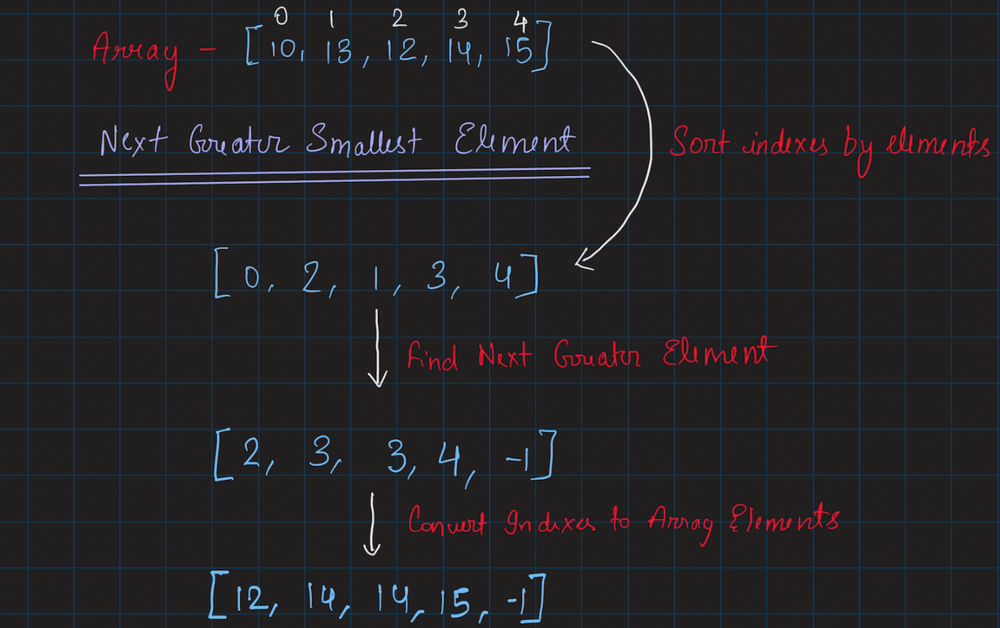

In [ ]:
# https://leetcode.com/problems/odd-even-jump/description/

class Solution:
    def oddEvenJumps(self, arr: List[int]) -> int:
        if not arr:
            return 0
        
        def next_greater_element(arr):
            n = len(arr)
            result = [None]*n
            stack = []
            
            for i in range(n):
                while stack and arr[stack[-1]] < arr[i]:
                    result[arr[stack.pop()]] = arr[i]
                stack.append(i)
            del stack
            return result
        
        n = len(arr)
        arr_sorted = sorted(range(n), key=lambda x: arr[x])
        odd = next_greater_element(arr_sorted)
        
        arr_sorted.sort(key=lambda x: arr[x], reverse=True)
        even = next_greater_element(arr_sorted)
        
        # Index 0, represents path starting with odd jump
        # Index 1, represents path starting with even jump
        dp = [[0, 0] for i in range(n)]
        
        # Last Index is always reachable.
        dp[-1] = [1, 1]
        
        for i in range(n-2, -1, -1):
            
            # If Odd Jump is possible
            if odd[i] is not None:
                dp[i][0] = dp[odd[i]][1]
                
            # If Even Jump is possible
            if even[i] is not None:
                dp[i][1] = dp[even[i]][0]
        
        return sum([i[0] for i in dp])
                    


In [ ]:
# https://github.com/doocs/leetcode/blob/main/solution/1000-1099/1062.Longest%20Repeating%20Substring/README_EN.md
#### Longest Repeating Substring

"""
Input: s = "aabcaabdaab"
Output: 3
Explanation: The longest repeating substring is "aab", which occurs 3 times.
"""

class Solution:
    def longestRepeatingSubstring(self, s: str) -> int:
        n = len(s)
        dp = [[0] * n for _ in range(n)]
        ans = 0
        for i in range(n):
            for j in range(i + 1, n):
                if s[i] == s[j]:
                    dp[i][j] = dp[i - 1][j - 1] + 1 if i else 1
                    ans = max(ans, dp[i][j])
        return ans

##### https://leetcode.com/problems/arithmetic-slices/description/   (slice = subarray)

```
class Solution {
public:
    int numberOfArithmeticSlices(vector<int>& A) {
        int n = A.size();
        if (n < 3) return 0;
        vector<int> dp(n, 0); // dp[i] means the number of arithmetic slices ending with A[i]
        if (A[2]-A[1] == A[1]-A[0]) dp[2] = 1; // if the first three numbers are arithmetic or not
        int result = dp[2];
        for (int i = 3; i < n; ++i) {
            // if A[i-2], A[i-1], A[i] are arithmetic, then the number of arithmetic slices ending with A[i] (dp[i])
            // equals to:
            //      the number of arithmetic slices ending with A[i-1] (dp[i-1], all these arithmetic slices appending A[i] are also arithmetic)
            //      +
            //      A[i-2], A[i-1], A[i] (a brand new arithmetic slice)
            // it is how dp[i] = dp[i-1] + 1 comes
            if (A[i]-A[i-1] == A[i-1]-A[i-2]) 
                dp[i] = dp[i-1] + 1;
            result += dp[i]; // accumulate all valid slices
        }
        return result;
    }
};
```


##### https://leetcode.com/problems/arithmetic-slices-ii-subsequence/description/   (subsequence = not contiguous)

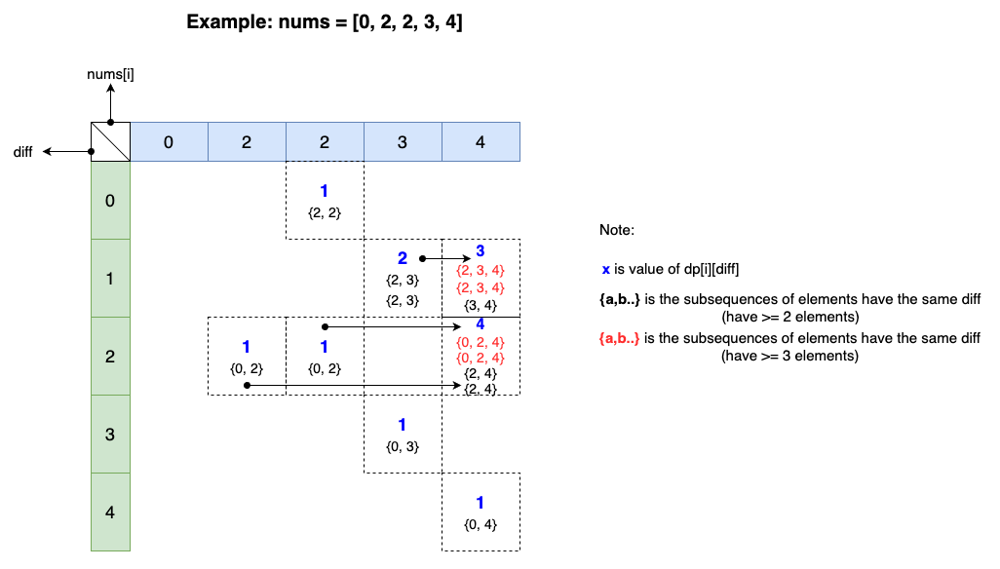

```
class Solution {
public:
    int numberOfArithmeticSlices(vector<int> &nums) {
        int n = nums.size();
        int ans = 0;
        vector<unordered_map<long long, int>> dp(n); // dp[i][d]
        for (int i = 1; i < n; i++) {
            for (int j = 0; j < i; j++) {
                long long diff = (long long) nums[i] - nums[j];
                int cnt = dp[j].count(diff) ? dp[j][diff] : 0;
                dp[i][diff] += cnt + 1;
                ans += cnt;
            }
        }
        return ans;
    }
};
```

In [ ]:
# https://leetcode.com/problems/longest-increasing-path-in-a-matrix/description/

def longestIncreasingPath(self, matrix):
    def dfs(i, j):
        if not dp[i][j]:
            val = matrix[i][j]
            dp[i][j] = 1 + max(
                dfs(i - 1, j) if i and val > matrix[i - 1][j] else 0,
                dfs(i + 1, j) if i < M - 1 and val > matrix[i + 1][j] else 0,
                dfs(i, j - 1) if j and val > matrix[i][j - 1] else 0,
                dfs(i, j + 1) if j < N - 1 and val > matrix[i][j + 1] else 0)
        return dp[i][j]

    if not matrix or not matrix[0]: return 0
    M, N = len(matrix), len(matrix[0])
    dp = [[0] * N for i in range(M)]
    return max(dfs(x, y) for x in range(M) for y in range(N))

In [ ]:
##### https://leetcode.com/problems/2-keys-keyboard/description/

"""
We start with 1 A on screen and with an empty clipboard,
In every iteration we have two options either we paste previously copied data or copy the current data and then paste it
Now, keep in mind that we can only paste if we have something in clipboard, if clipboard is empty we cannot paste
For base case, since out target is to get n A's on screen, we return 0 when screen == n and 
if A's on screen becomes greater than n then we need to discard this so we return Infinty, since we take min this will be discarded
"""

class Solution:
    def minSteps(self, n: int) -> int:
        cache = {}
        def helper(screen, clipboard):
            if (screen, clipboard) in cache: return cache[(screen, clipboard)]
            if screen == n: return 0
            if screen > n: return float("Inf")
            
            copy_paste = helper(screen+screen, screen) + 2
            paste = float("Inf")
            if clipboard:
                paste = helper(screen + clipboard, clipboard) + 1

            cache[(screen, clipboard)] = min(copy_paste, paste)    
            return cache[(screen, clipboard)]
        
        return helper(1, 0)

# String Patterns DP

In [ ]:
# https://leetcode.com/problems/longest-palindromic-substring/description/

# first calculate for size of 1 and 2
# use dp to calculate for size 3 and above
# dp[i][j] = dp[i+1][j-1] and s[i] == s[j]

class Solution:
    def longestPalindrome(self, s: str) -> str:
        n = len(s)
        dp = [[False]*n for _ in range(n)]
        maxLen, startIndex = 1, 0 

        for i in range(n):
            dp[i][i] = True
        
        for i in range(n-1):
            dp[i][i+1] = s[i] == s[i+1]
            if dp[i][i+1] and maxLen < 2:
                maxLen = 2
                startIndex = i

        for k in range(3, n+1):
            for i in range(n-k+1):
                j = i+k-1
                if s[i] == s[j] and dp[i+1][j-1]:
                    dp[i][j] = True
                    maxLen = k
                    startIndex = i
        

        return s[startIndex: startIndex+maxLen]

In [ ]:
# Edit Distance
# https://leetcode.com/problems/edit-distance/description/

# check if word1[i] == word2[j] then dp[i][j] = dp[i-1][j-1]
# else dp[i][j] = min(dp[i-1][j-1], dp[i-1][j], dp[i][j-1]) + 1


class Solution:
    def minDistance(self, word1: str, word2: str) -> int:
        m, n = len(word1), len(word2)
        dp = [[0]*(n+1) for _ in range(m+1)]

        for i in range(m+1):
            for j in range(n+1):
                if i == 0:
                    dp[i][j] = j
                elif j == 0:
                    dp[i][j] = i
                elif word1[i-1] == word2[j-1]:
                    dp[i][j] = dp[i-1][j-1] 
                else:
                    dp[i][j] = min([dp[i-1][j-1], dp[i-1][j], dp[i][j-1]]) + 1

        return dp[m][n]
        

In [ ]:
# Maximum Length of Repeated Subarray (Similar to Longest Common Substring)
# https://leetcode.com/problems/maximum-length-of-repeated-subarray/description/

class Solution:
    def findLength(self, nums1: List[int], nums2: List[int]) -> int:
        m, n = len(nums1), len(nums2)
        dp = [[0]*(n+1) for _ in range(m+1)]
        ans = 0
        for i in range(1, m+1):
            for j in range(1, n+1):
                if nums1[i-1] == nums2[j-1]:
                    dp[i][j] = 1 + dp[i-1][j-1]
                    ans = max(ans, dp[i][j])
        
        return ans


# LIS (Longest Increasing Subsequence)

In [ ]:
# LIS (Longest Increasing Subsequence) pattern
# https://leetcode.com/problems/longest-increasing-subsequence/description/

# use dp array to store the longest increasing subsequence till that index
# use bisect_left to find the index to insert the current element in dp array

from bisect import bisect_left

class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        dp = []
        for i in range(len(nums)):
            num = nums[i]
            pos = bisect_left(dp, num)
            if (pos == len(dp)):
                dp.append(num)
            else:
                dp[pos] = num
        return len(dp)

# MISC

In [ ]:
# Soup Serving
# https://leetcode.com/problems/soup-servings/solutions/121740/straightforward-java-recursion-with-memorization/

In [ ]:
# Minimum time to finish the race
# https://leetcode.com/problems/minimum-time-to-finish-the-race/solutions/1802444/c-linear-time-dp-with-explanation/

# https://leetcode.com/problems/filling-bookcase-shelves/description/

# https://leetcode.com/problems/delivering-boxes-from-storage-to-ports/description/

# Greedy

In [ ]:
# https://leetcode.com/problems/count-k-subsequences-of-a-string-with-maximum-beauty/description/  (MATH)

# Mono Queue / Mono Stack

In [ ]:
 #odd even jump
# https://leetcode.com/problems/maximal-rectangle/description/
# https://leetcode.com/problems/largest-rectangle-in-histogram/description/
# https://leetcode.com/problems/maximum-score-of-a-good-subarray/description/

"""
The score of a subarray (i, j) is defined as min(nums[i], nums[i+1], ..., nums[j]) * (j - i + 1). A good subarray is a subarray where i <= k <= j.
Example 1:
Input: nums = [1,4,3,7,4,5], k = 3
Output: 15
Explanation: The optimal subarray is (1, 5) with a score of min(4,3,7,4,5) * (5-1+1) = 3 * 5 = 15. 

Example 2:
Input: nums = [5,5,4,5,4,1,1,1], k = 0
Output: 20
Explanation: The optimal subarray is (0, 4) with a score of min(5,5,4,5,4) * (4-0+1) = 4 * 5 = 20.
"""

class Solution:
    def maximalRectangle(self, matrix: List[List[str]]) -> int:
        if len(matrix) == 0: return 0
        m, n = len(matrix), len(matrix[0])
        dp = [0] * n
        maxArea = 0
        for r in range(m):
            for c in range(n):
                if matrix[r][c] == "1":
                    dp[c] += 1
                else:
                    dp[c] = 0
            maxArea = max(maxArea, self.maxRectangleInHistogram(dp))
        return maxArea

    def maxRectangleInHistogram(self, heights):  # O(N)
        n = len(heights)
        st = [-1]
        maxArea = 0
        for i in range(n):
            while st[-1] != -1 and heights[st[-1]] >= heights[i]:
                currentHeight = heights[st.pop()]
                currentWidth = i - st[-1] - 1
                maxArea = max(maxArea, currentWidth * currentHeight)
            st.append(i)
        while st[-1] != -1:
            currentHeight = heights[st.pop()]
            currentWidth = n - st[-1] - 1
            maxArea = max(maxArea, currentWidth * currentHeight)
        return maxArea



#### https://leetcode.com/problems/largest-submatrix-with-rearrangements/description/
#### you are allowed to rearrange the columns of the matrix in any order.

```
class Solution {
public:
    int largestSubmatrix(vector<vector<int>>& matrix) {
        int m = matrix.size(), n = matrix[0].size();
        int ans = 0;
        vector<int> height(n, 0);
		
		// view each row and its above as pillars 
        for(int i = 0; i < m; ++i){
			// calculate heights
            for(int j = 0; j < n; ++j){
                if(matrix[i][j] == 0) height[j] = 0;
                else height[j] += 1;
            }
			
			// sort pillars
            vector<int> order_height = height;
            sort(order_height.begin(), order_height.end());
			
			// iterate to get the maxium rectangle
            for(int j = 0; j < n; ++j){
                ans = max(ans, order_height[j] * (n - j));
            }
        }
        return ans;
    }
};
```

In [ ]:
# https://leetcode.com/problems/shortest-subarray-with-sum-at-least-k/description/
### https://leetcode.com/problems/minimum-size-subarray-sum/

# Math Design Questions

In [ ]:
# https://doocs.github.io/leetcode/en/lc/359/?h=logger#solution-1
class Logger:
    def __init__(self):
        self.limiter = {}

    def shouldPrintMessage(self, timestamp: int, message: str) -> bool:
        if message not in self.limiter:
            self.limiter[message] = timestamp
            return True
        elif timestamp - self.limiter[message] >= 10:
            self.limiter[message] = timestamp
            return True
        return False

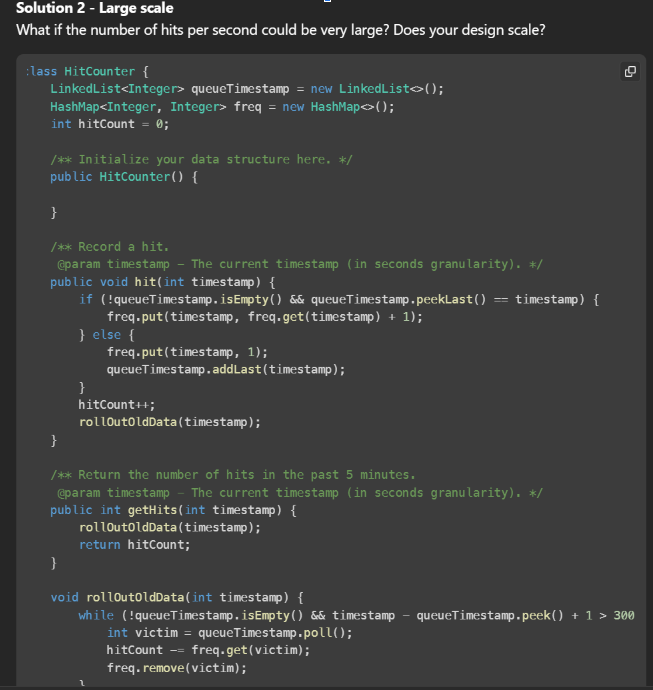

In [ ]:
# Desing Hit Counter
# https://github.com/doocs/leetcode/blob/main/solution/0300-0399/0362.Design%20Hit%20Counter/README_EN.md

# getHits - return the number of hits in the past 5 minutes 300 seconds

class HitCounter:

    def __init__(self):
        self.ts = []

    def hit(self, timestamp: int) -> None:
        self.ts.append(timestamp)

    def getHits(self, timestamp: int) -> int:
        return len(self.ts) - bisect_left(self.ts, timestamp - 300 + 1)


#### https://leetcode.com/problems/lru-cache/description/
#### https://leetcode.com/problems/lfu-cache/description/

```
class Node{
    public:
    int key, val;
    Node *next, *prev;
    Node(int key, int val) {
        this->key = key;
        this->val = val;
        this->next = NULL;
        this->prev = NULL;
    }
};

class DoubleLL {
    public:
    Node *head, *tail;
    DoubleLL() {
        this->head = new Node(-1, -1);
        this->tail = new Node(-1, -1);
        this->head->next = tail;
        this->tail->prev = head;
    }

    Node* insertHead(int key, int val) {
        Node *node = new Node(key, val);
        Node *next = head->next;
        head->next = node;
        node->prev = head;
        node->next = next;
        next->prev = node;
        return node;
    }

    void removeTail() {
        Node *node = tail->prev;
        Node *prev = node->prev;
        prev->next = tail;
        tail->prev = prev;
    }

    void removeNode(Node *node) {
      //  cout << node->key << " " << node->val << endl;
        Node *prev = node->prev;
        Node *next = node->next;
        prev->next = next;
        next->prev = prev;
    }
};

class LRUCache {
public:
    unordered_map<int, Node*> um;
    int cap, count;
    DoubleLL *dll;
    LRUCache(int capacity) {
        cap = capacity;
        count = 0;
        dll = new DoubleLL();
    }
    
    int get(int key) {
        if (um.find(key) == um.end()) return -1;
        Node *node = um[key];
        dll->removeNode(node);
        node = dll->insertHead(node->key, node->val);
        um[key] = node;
        return node->val;
    }
    
    void put(int key, int value) {
        if (um.find(key) != um.end()) {
            Node *node = um[key];
            dll->removeNode(node);
            node = dll->insertHead(node->key, value);
            um[key] = node;
            return;
        }
      //  cout << "key " << key << " " << um.size() << endl;
        if (um.size() >= cap) {
            int delKey = dll->tail->prev->key;
           // cout << "del key " << delKey << endl;
            um.erase(delKey);
            dll->removeTail();
        }
        Node *node = dll->insertHead(key, value);
        um[key] = node;
    }
};

```

In [ ]:
# https://leetcode.com/problems/snapshot-array/description/

"""
Idea
We map index with (snapId, val), let name it map.

For get(index, snapId):
Get versions from the map based on index, arr = map[index].
We binary search on arr to find the version, which has largest snapId <= snapId.

For example:
set(index=1, val=9), snapId = 0
snap(), snapId = 1
snap(), snapId = 2
get(index=1, snapId=2)
"""

class SnapshotArray:
    def __init__(self, length: int):
        self.map = defaultdict(list)
        self.snapId = 0

    def set(self, index: int, val: int) -> None:
        if self.map[index] and self.map[index][-1][0] == self.snapId:
            self.map[index][-1][1] = val
            return
        self.map[index].append([self.snapId, val])

    def snap(self) -> int:
        self.snapId += 1
        return self.snapId - 1

    def get(self, index: int, snap_id: int) -> int:
        arr = self.map[index]
        left, right, ans = 0, len(arr) - 1, -1
        while left <= right:
            mid = (left + right) // 2
            if arr[mid][0] <= snap_id:
                ans = mid
                left = mid + 1
            else:
                right = mid - 1
        if ans == -1: return 0
        return arr[ans][1]

##### https://leetcode.com/problems/find-unique-binary-string/description/
##### Cantor's Diagonalization.  - https://en.wikipedia.org/wiki/Cantor%27s_diagonal_argument
```
class Solution {
public:
    string findDifferentBinaryString(vector<string>& nums) {
        string ans="";
        for(int i=0; i<nums.size(); i++) 
            ans+= nums[i][i]=='0' ? '1' : '0';          // Using ternary operator
			// ans+=to_string(1-(nums[i][i]-'0'));     // Alternate:  or use to_string & 1-x to flip
        return ans;
    }
};
```

In [ ]:
# https://leetcode.com/problems/implement-rand10-using-rand7/description/ (To be solved)

# https://leetcode.com/problems/stock-price-fluctuation/description/

```
public:
    map<int, int> rec;
    multiset<int> count;

    void update(int t, int p) {
        if (rec.find(t) != rec.end())
            count.erase(count.find(rec[t]));
        rec[t] = p;
        count.insert(p);
    }

    int current() {
        return rec.rbegin()->second;
    }

    int maximum() {
        return *count.rbegin();
    }

    int minimum() {
        return *count.begin();
    }
```

# Geometry

In [ ]:
# https://leetcode.com/problems/minimum-area-rectangle/description/

# first add all points to set
# need to check is if x1 > x2 and y1 > y2 then check if (x1, y2) and (x2, y1) exists in set

class Solution:
    def minAreaRect(self, points: List[List[int]]) -> int:
        ans, points_st = float('inf'), set()

        for x, y in points:
            points_st.add((x, y))

        for x1, y1 in points:
            for x2, y2 in points:
                if x1 > x2 and y1 > y2 :
                    if (x1, y2) in points_st and (x2, y1) in points_st:
                        ans = min(ans, abs(x1-x2) * abs(y1-y2))

        return 0 if ans == float('inf') else ans

##### https://leetcode.com/problems/detect-squares/description/
```
Input
["DetectSquares", "add", "add", "add", "count", "count", "add", "count"]
[[], [[3, 10]], [[11, 2]], [[3, 2]], [[11, 10]], [[14, 8]], [[11, 2]], [[11, 10]]]
Output
[null, null, null, null, 1, 0, null, 2]

Explanation
DetectSquares detectSquares = new DetectSquares();
detectSquares.add([3, 10]);
detectSquares.add([11, 2]);
detectSquares.add([3, 2]);
detectSquares.count([11, 10]); // return 1. You can choose:
                               //   - The first, second, and third points
detectSquares.count([14, 8]);  // return 0. The query point cannot form a square with any points in the data structure.
detectSquares.add([11, 2]);    // Adding duplicate points is allowed.
detectSquares.count([11, 10]); // return 2. You can choose:
                               //   - The first, second, and third points
                               //   - The first, third, and fourth points

class DetectSquares { // 216 ms, faster than 66.67%
public:
    int cntPoints[1001][1001] = {};
    vector<pair<int, int>> points;

    void add(vector<int> p) {
        cntPoints[p[0]][p[1]]++;
        points.emplace_back(p[0], p[1]);
    }

    int count(vector<int> p1) {
        int x1 = p1[0], y1 = p1[1], ans = 0;
        for (auto& [x3, y3] : points) {
            if (abs(x1-x3) == 0 || abs(x1-x3) != abs(y1-y3))
                continue; // Skip empty square or invalid square point!
            ans += cntPoints[x1][y3] * cntPoints[x3][y1];
        }
        return ans;
    }
};
```